In [24]:
import os
import cv2
import numpy as np
from sklearn.utils import shuffle

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 6]

import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Input

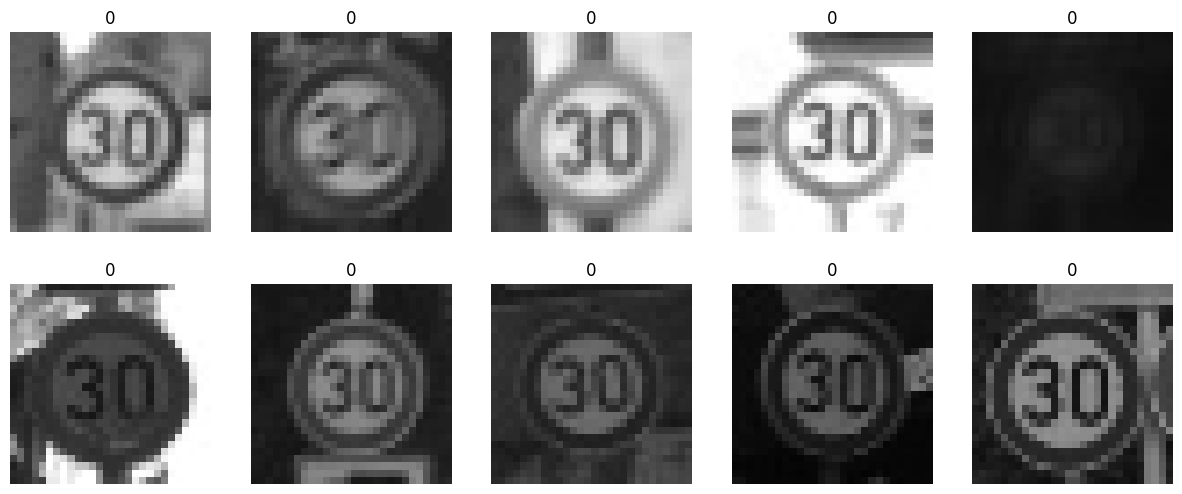

In [25]:
folder = 'subset'

fnames_0 = os.listdir(os.path.join(folder, 'class_id_0'))
images_0 = [cv2.imread(os.path.join(folder, 'class_id_0', f), cv2.IMREAD_UNCHANGED) for f in fnames_0]
labels_0 = [0] * len(images_0)

for cnt, idx in enumerate(np.random.randint(0, len(images_0), 10)):
    plt.subplot(2,5,cnt+1)
    plt.imshow(images_0[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels_0[idx]), plt.axis(False)

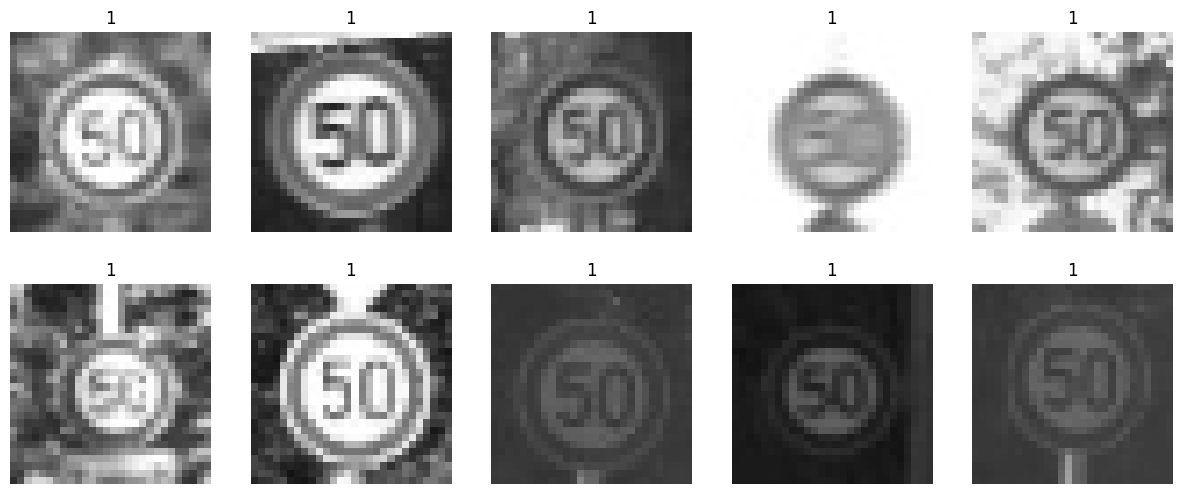

In [26]:
fnames_1 = os.listdir(os.path.join(folder, 'class_id_1'))
images_1 = [cv2.imread(os.path.join(folder, 'class_id_1', f), cv2.IMREAD_UNCHANGED) for f in fnames_1]
labels_1 = [1] * len(images_1)

for cnt, idx in enumerate(np.random.randint(0, len(images_1), 10)):
    plt.subplot(2,5,cnt+1)
    plt.imshow(images_1[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels_1[idx]), plt.axis(False)

In [27]:
print('Num samples class_0', len(images_0))
print('Num samples class_1', len(images_1))

Num samples class_0 2220
Num samples class_1 2250


In [28]:
images = images_0 + images_1
labels = labels_0 + labels_1
images, labels = shuffle(images, labels)

images = np.array(images)
labels = np.array(labels)

print('Images', images.shape)
print('Labels', labels.shape)

Images (4470, 28, 28)
Labels (4470,)


In [29]:
pixels = np.array([image.flatten() for image in images])/255
print('Shape', pixels.shape)

Shape (4470, 784)


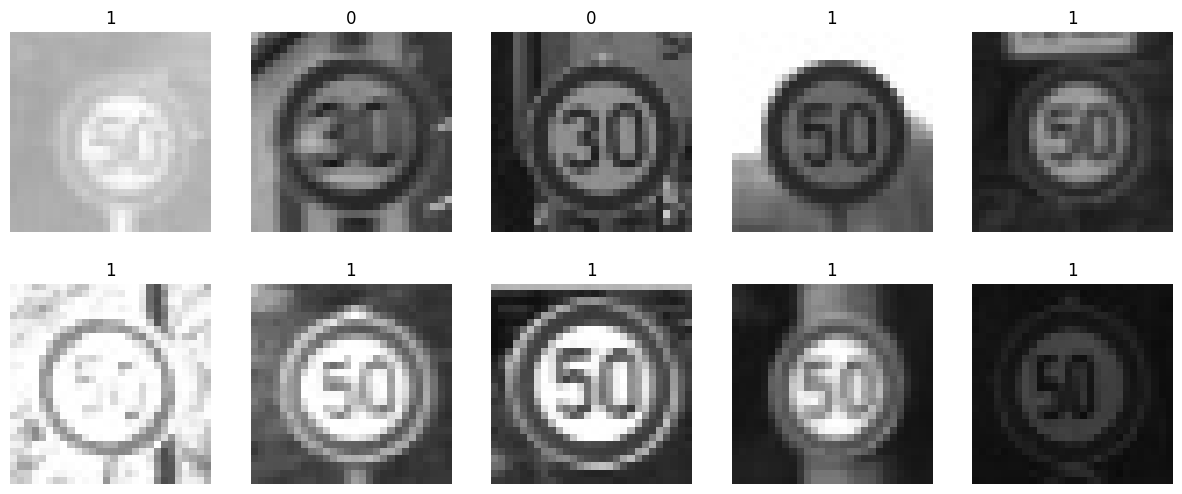

In [30]:
for cnt, idx in enumerate(np.random.randint(0, len(images), 10)):
    plt.subplot(2,5,cnt+1)
    plt.imshow(images[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels[idx])
    plt.axis("off")

In [42]:
inputs = Input(shape=(pixels.shape[1]))
input = Dense(10, activation="linear")(inputs)
outputs = Dense(1, activation="linear")(input)
model = Model(inputs, outputs)

model.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   


 input_20 (InputLayer)       [(None, 784)]             0         
                                                                 
 dense_20 (Dense)            (None, 10)                7850      
                                                                 
 dense_21 (Dense)            (None, 1)                 11        
                                                                 
Total params: 7,861
Trainable params: 7,861
Non-trainable params: 0
_________________________________________________________________


In [43]:
model.compile(optimizer ='adam', loss = 'mean_squared_error')
history = model.fit(pixels, labels, epochs=10, batch_size=32)

Epoch 1/10
140/140 [==============================] - 0s 875us/step - loss: 0.3135
Epoch 2/10
140/140 [==============================] - 0s 825us/step - loss: 0.1850
Epoch 3/10
140/140 [==============================] - 0s 887us/step - loss: 0.1371
Epoch 4/10
140/140 [==============================] - 0s 820us/step - loss: 0.1175
Epoch 5/10
140/140 [==============================] - 0s 878us/step - loss: 0.1081
Epoch 6/10
140/140 [==============================] - 0s 871us/step - loss: 0.1097
Epoch 7/10
140/140 [==============================] - 0s 929us/step - loss: 0.0956
Epoch 8/10
140/140 [==============================] - 0s 898us/step - loss: 0.1009
Epoch 9/10
140/140 [==============================] - 0s 822us/step - loss: 0.0928
Epoch 10/10
140/140 [==============================] - 0s 2ms/step - loss: 0.0924


In [45]:
predictions = model.predict(pixels).squeeze()
predictions = predictions > 0.5
correct = 0

for prediction, label in zip(predictions, labels):
    if prediction == label:
        correct = correct + 1

print('Accuracy', correct/len(labels))

140/140 [==============================] - 0s 855us/step
Accuracy 0.9534675615212528


In [53]:
inputs = Input(shape=(pixels.shape[1]))
input1 = Dense(10, activation="linear")(inputs)
input2 = Dense(6, activation="linear")(input1)
input3 = Dense(4, activation="linear")(input2)
outputs = Dense(1, activation="linear")(input3)
model = Model(inputs, outputs)

model.summary()

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_21 (InputLayer)       [(None, 784)]             0         
                                                                 
 dense_24 (Dense)            (None, 10)                7850      
                                                                 
 dense_25 (Dense)            (None, 6)                 66        
                                                                 
 dense_26 (Dense)            (None, 4)                 28        
                                                                 
 dense_27 (Dense)            (None, 1)                 5         
                                                                 
Total params: 7,949
Trainable params: 7,949
Non-trainable params: 0
_________________________________________________________________


In [54]:
model.compile(optimizer ='adam', loss = 'mean_squared_error')
history = model.fit(pixels, labels, epochs=10, batch_size=32)

Epoch 1/10
140/140 [==============================] - 1s 1ms/step - loss: 0.3022
Epoch 2/10
140/140 [==============================] - 0s 1ms/step - loss: 0.1749
Epoch 3/10
140/140 [==============================] - 0s 1ms/step - loss: 0.1246
Epoch 4/10
140/140 [==============================] - 0s 1ms/step - loss: 0.1300
Epoch 5/10
140/140 [==============================] - 0s 1ms/step - loss: 0.1055
Epoch 6/10
140/140 [==============================] - 0s 2ms/step - loss: 0.1005
Epoch 7/10
140/140 [==============================] - 0s 1ms/step - loss: 0.0923
Epoch 8/10
140/140 [==============================] - 0s 1ms/step - loss: 0.0939
Epoch 9/10
140/140 [==============================] - 0s 1ms/step - loss: 0.0889
Epoch 10/10
140/140 [==============================] - 0s 1ms/step - loss: 0.0889


In [55]:
predictions = model.predict(pixels).squeeze()
predictions = predictions > 0.5
correct = 0

for prediction, label in zip(predictions, labels):
    if prediction == label:
        correct = correct + 1

print('Accuracy', correct/len(labels))

140/140 [==============================] - 0s 1ms/step
Accuracy 0.9519015659955258
